# Introduction to Machine Learning

## 1. Define Imports

In [41]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Config
%matplotlib inline

sns.set(style='white', context='notebook', palette='deep')

## 2. Load Data Set

In [17]:
train_dataset = pd.read_csv('./digit-recognizer/train.csv')
test_dataset = pd.read_csv('./digit-recognizer/test.csv')

## 3. Data Processing & Visualization

In [8]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Count of Labels to Check if there is an imbalance in the dataset

In [12]:
train_dataset['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [13]:
labels = train_dataset['label']

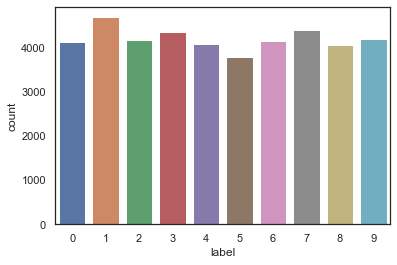

In [16]:
g = sns.countplot(labels)

### Check for null values in your dataset

In [24]:
train_dataset.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [25]:
test_dataset.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [26]:
# You can use dataframe.dropna(subset=[columns], inplace=True) to drop rows having null values in input columns 

### Separate Features & Lables from the dataset

In [27]:
Y = train_dataset['label']
X = train_dataset.drop(labels=['label'], axis=1)

### Display Random Images to see the data

In [18]:
def display_samples(trainig_dataset: pd.DataFrame,
                    digits=[0,1,2,3,4,5,6,7,8,9],
                    number_in_row=5,
                    figsize=(10,25),
                    **imshow_kwargs):
    """
    Ramdomly picks digits from dataset and displays them.
    
    Keyword arguments:
    training_dataset -- consists of 'label' column and 784 columns from pixel0 to pixel783 
    digits -- digits to display, order matters
    number_in_row -- how many samples of each digit to display in a row
    figsize -- figure size, tuple (width, height) in inches
    imshow_kwargs -- keyword arguments of matplotlib.axes.Axes.imshow() except X 
    (cmap, norm, aspect, interpolation, etc) according to the definition
    https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow
    """
    # randomly picks records
    picked_records = train_dataset[train_dataset['label'].isin(digits)].sample(frac=1).groupby('label').head(number_in_row)
    
    fig, axes = plt.subplots(len(digits), number_in_row, figsize=figsize)
    
    for i in range(len(digits)):
        i_digit_records = picked_records[picked_records['label']==digits[i]]
        
        # converts rows of pixels into 28x28 matrices
        image_array = i_digit_records.iloc[:, 1:].values.reshape(number_in_row, 28, 28)
        
        for j in range(number_in_row):
            axes[i, j].imshow(
                image_array[j, :, :],
                cmap = imshow_kwargs.get('cmap', None),
                norm = imshow_kwargs.get('norm', None),
                aspect = imshow_kwargs.get('aspect', None),
                interpolation = imshow_kwargs.get('interpolation', None),
                alpha = imshow_kwargs.get('alpha', None),
                vmin = imshow_kwargs.get('vmin', None),
                vmax = imshow_kwargs.get('vmax', None),
                origin = imshow_kwargs.get('origin', None),
                extent = imshow_kwargs.get('extent', None),
                filternorm = imshow_kwargs.get('filternorm', 1),
                filterrad = imshow_kwargs.get('filterrad', 4.0),
                resample = imshow_kwargs.get('resample', None),
                url = imshow_kwargs.get('url', None)
            )

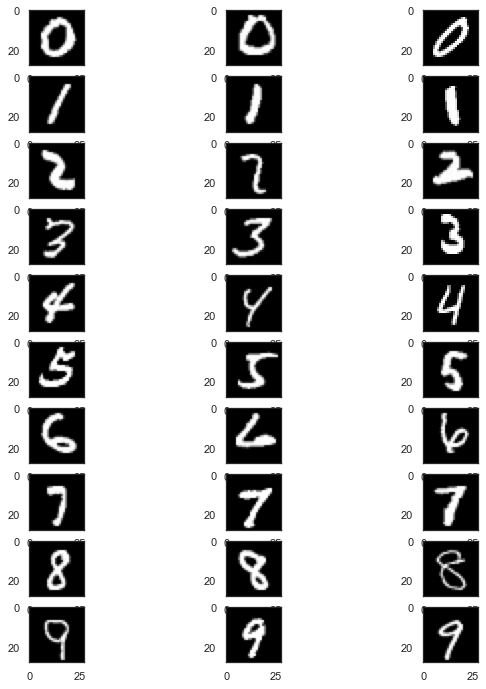

In [20]:
display_samples(train_dataset, [0,1,2,3,4,5,6,7,8,9], 3, figsize=(10,12), cmap='gray', vmin=0, vmax=255)

### To Counter the Effect of Illumination Difference we perform grayscale normalization

In [28]:
X = X / 255.0
test_dataset = test_dataset / 255.0

### Re-scale the Features

In [29]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

### Split the Training Dataset into Training and Validation Parts

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 42)

In [34]:
X_train.shape

(29400, 784)

In [35]:
X_val.shape

(12600, 784)

## Model Training & Validation

### Define Model

In [36]:
svc_nonlinear = SVC(kernel='rbf')

### Train

In [37]:
svc_nonlinear.fit(X_train, y_train)

SVC()

### Predict

In [39]:
y_pred = svc_nonlinear.predict(X_val)

### Accuracy & Confusion Matrix

In [43]:
print("accuracy:", metrics.accuracy_score(y_true=y_val, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_val, y_pred=y_pred))

accuracy: 0.9567460317460318 

[[1177    0    7    1    2    3    8    1    1    0]
 [   0 1365   13    1    1    1    1    2    4    1]
 [   4    6 1254    5    6    0    2    6   11    0]
 [   3    4   21 1275    0   14    0   12   20    6]
 [   1    1   18    0 1171    2    7    3    2   17]
 [   2    1   13   23    1 1025   14    1    3    2]
 [   9    2   18    0    5    9 1209    0    4    0]
 [   0    6   26    4   13    1    0 1286    1   22]
 [   2    6   12   14    5   13    6    2 1146    3]
 [   5    1   18   14   14    2    0   24    6 1147]]
